In [1]:
import pandas as pd 
import numpy as np 
import mesa
import geopandas as gpd 
from geopandas import GeoDataFrame
import os 
import random
import time
import networkx as nx 
import matplotlib.pyplot as plt 
%matplotlib inline 

path = os.getcwd()
#rootpath = 'c:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\ABM\\Solar-Adoption-Agent-based-Model\\'
rootpath = '/Users/rtseinstein/Documents/GitHub/Solar-Adoption-Agent-based-Model/'
rootpath

'/Users/rtseinstein/Documents/GitHub/Solar-Adoption-Agent-based-Model/'

In [2]:
output = pd.read_csv(rootpath+'experiment/tpbvalues_updating_trial.csv')
output = output.drop(columns='Unnamed: 0')

output['adoption_status'].value_counts()

0    14608
1      392
Name: adoption_status, dtype: int64

In [3]:
## Adoption Counts
fig,ax = plt.subplots(figsize=(8,8))
output.groupby('timestep')['adoption_status'].value_counts().unstack()[1].plot.line(ax=ax, color='r',label='Timesteps vs Adoptions')

#output.groupby('timestep')['adoption_status'].value_counts().unstack()[1].cumsum().plot.line(ax=ax, color='b',label='Cumulative Adoptions')
#.cumsum()
plt.legend()



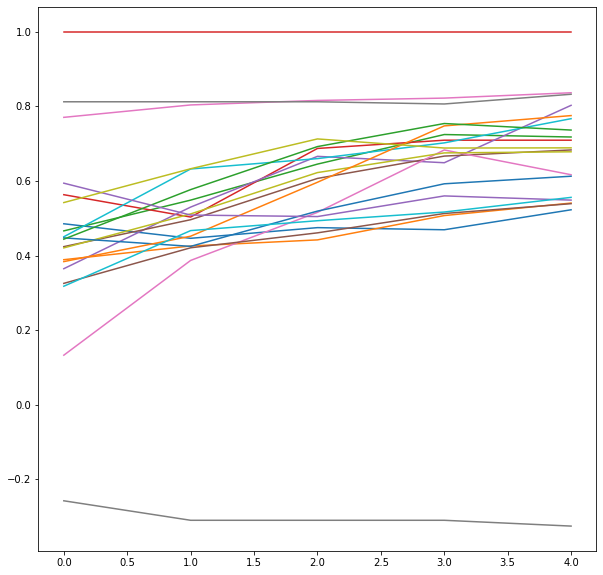

In [28]:
## plotting evolution of attitudes:
import random
fig,ax = plt.subplots(figsize=(10,10))
case_ids = list(output['case_id'].unique())

for i in random.choices(case_ids,k=20):
    plt.plot(list(output.loc[output['case_id']==i,'attitude'].values))
    #output.groupby('timestep')['attitude'].median().plot(color='r',linewidth=3.5,label='Median Attitude')
plt.show()

<AxesSubplot:xlabel='income'>

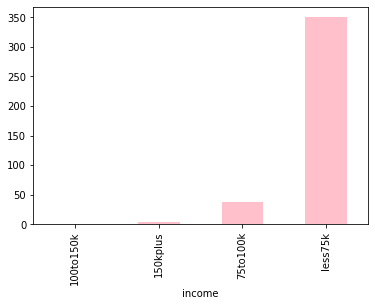

In [24]:
df = pd.read_csv(rootpath+'data/households_subset/subset_initialized_latlonvalues.csv')
df = df.drop(columns='Unnamed: 0') 
df=df.set_index('CASE_ID')
inc_dict = df['income'].to_dict()
age_dict = df['age'].to_dict()

output['income']= output['case_id'].map(inc_dict)
output['age']= output['case_id'].map(age_dict)
#output.groupby('income')['adoption_status'].value_counts()
output.groupby('income')['adoption_status'].value_counts().unstack()[1].plot.bar(color='pink')

In [25]:
df = pd.read_csv(rootpath+'data/households_subset/subset_initialized_latlonvalues.csv')
df = df.drop(columns='Unnamed: 0') 
df=df.set_index('CASE_ID')
inc_dict = df['income'].to_dict()
age_dict = df['age'].to_dict()

output['income']= output['case_id'].map(inc_dict)
output['age']= output['case_id'].map(age_dict)
#output.groupby('income')['adoption_status'].value_counts()
output.groupby('age')['adoption_status'].value_counts().unstack()[1].plot.bar(rot=1, color='orange')

<AxesSubplot:xlabel='age'>

<AxesSubplot:>

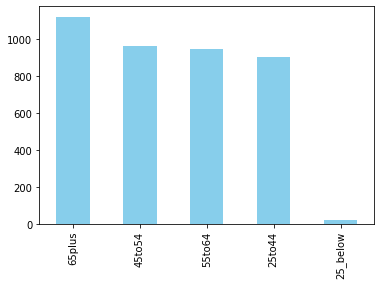

In [115]:
df['age'].value_counts().plot.bar(color='skyblue')

<AxesSubplot:>

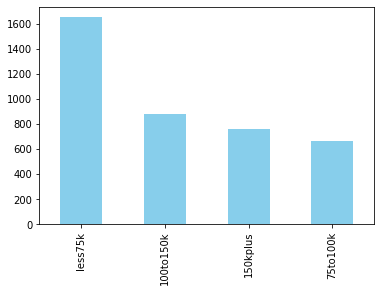

In [116]:
df['income'].value_counts().plot.bar(color='skyblue')

In [123]:
gdf = gpd.read_file(rootpath+'data\\subset_households_5percent.shp')
gdf = gdf.set_index('case_id')

geomap = gdf['geometry'].to_dict()

output['geometry'] = output['case_id'].map(geomap)
outputgdf = GeoDataFrame(output, crs="EPSG:4326", geometry=list(output['geometry']))

outputgdf.to_file(rootpath+'data\\output_gdf.shp')



ipykernel_launcher:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [62]:
output.loc[651].case_id

11595.0

In [15]:
## change in attitudes over time
fig,ax = plt.subplots(figsize=(8,8))

output.groupby('timestep')['attitude'].median().plot(ax=ax, color='r',linewidth=3.5,label='Median Attitude')
#plt.plot(list(output.loc[output['case_id']==49601.0,'attitude'].values), alpha=0.5)
#plt.plot(list(output.loc[output['case_id']==2670.0,'attitude'].values),alpha=0.5)
#plt.plot(list(output.loc[output['case_id']==40932.0,'attitude'].values),alpha=0.5)
#plt.plot(list(output.loc[output['case_id']==21782.0,'attitude'].values),alpha=0.3)
#plt.plot(list(output.loc[output['case_id']==42443.0,'attitude'].values),alpha=0.3)
#plt.plot(list(output.loc[output['case_id']==66397.0,'attitude'].values),alpha=0.3)
#plt.plot(list(output.loc[output['case_id']==11595.0,'attitude'].values),alpha=0.3)

plt.legend()